# Librairies and Custom functions

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from subprocess import check_output
import warnings
warnings.filterwarnings('ignore') 
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report, f1_score

# function to add percentage to plot
def annot_plot(ax,w,h):                                    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')

In [0]:
df = pd.read_csv('/content/sample_data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

# Exploratory Data Analysis

## Standard checking

The Dataset contains :
*   9134 observations
*   24 variables


In [42]:
df.shape

(9134, 24)

In [43]:
df.head(10)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


Here we change the type of 'Response' observations from string to integer in order to facilitate the processing

In [0]:
df.Response = df.Response.apply(lambda X : 0 if X == 'No' else 1)
df.columns = df.columns.str.replace(' ','_')

In [45]:
df.head(10)

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,0,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,1,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,1,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,0,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,1,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,0,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


There is no NULL values

In [46]:
df.isnull().sum()

Customer                         0
State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

## Conversion Rate & Marketing Analysis

### Conversion Rate

In [47]:
converters = df[df.Response == 1]\
['Customer'].nunique()
total = df['Customer'].nunique()
conv_rate = converters/total
print("Conversion Rate is {}%".format(round(conv_rate*100, 2),'%'))

Conversion Rate is 14.32%


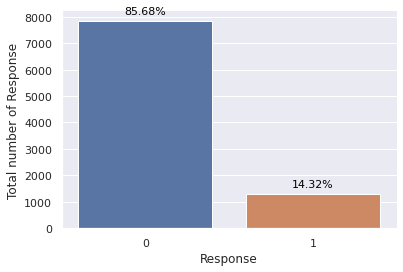

In [48]:
ax = sns.countplot('Response',data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

### Marketing Analysis

#### conversion by offer type

In [49]:
df.Renew_Offer_Type.value_counts()


Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew_Offer_Type, dtype: int64

In [0]:
by_offer_type = df.loc[df.Response == 1].groupby(['Renew_Offer_Type'])['Customer'].count()/df.groupby('Renew_Offer_Type')["Customer"].count()

In [51]:
by_offer_type.head()

Renew_Offer_Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

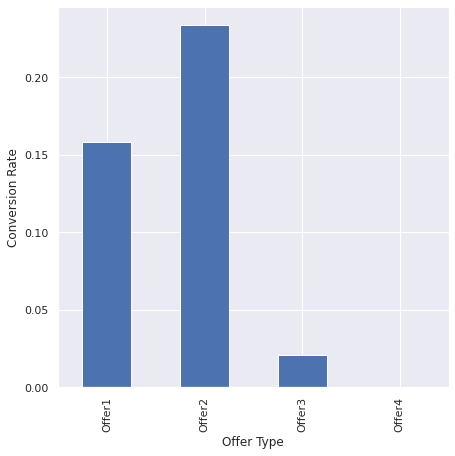

In [52]:
ax_byof = by_offer_type.plot(kind="bar",grid=True,figsize=(7,7))
ax_byof.set_xlabel("Offer Type")
ax_byof.set_ylabel("Conversion Rate")
plt.show()

Best performance is offer 2
Worst is offer 4 that hasn't generated any conversion

#### conversion by channel

In [0]:
by_sale_ch = df.loc[df.Response == 1].groupby("Sales_Channel")["Customer"].count()

In [54]:
by_sale_ch

Sales_Channel
Agent          666
Branch         294
Call Center    192
Web            156
Name: Customer, dtype: int64

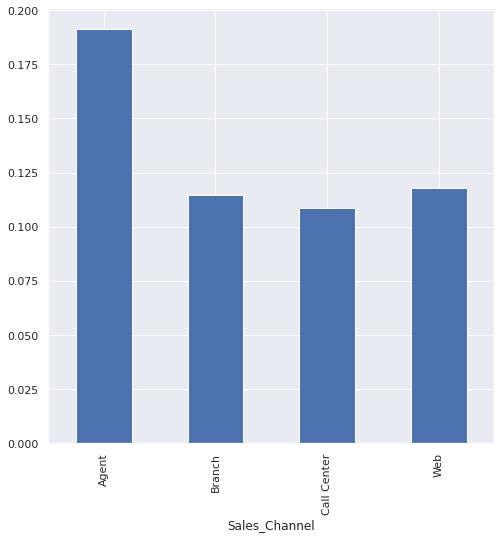

In [55]:
by_sale_ch_plot = by_sale_ch / df.groupby("Sales_Channel")["Customer"].count()
ax1 = by_sale_ch_plot.plot(kind="bar",grid=True,figsize=(8,8))
ax.set_xlabel("Sales Channel")
ax.set_ylabel("Conversion Rate")
plt.show()

#### conversion by vehicule class

In [56]:
Vehicle_Class = df.Vehicle_Class.value_counts()
Vehicle_Class

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle_Class, dtype: int64

In [57]:
Vehicle_Class.columns = ['type','volume']
Vehicle_Class.head()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Name: Vehicle_Class, dtype: int64

In [58]:
Vehicle_Class.sort_values(axis=0)

Luxury Car        163
Luxury SUV        184
Sports Car        484
SUV              1796
Two-Door Car     1886
Four-Door Car    4621
Name: Vehicle_Class, dtype: int64

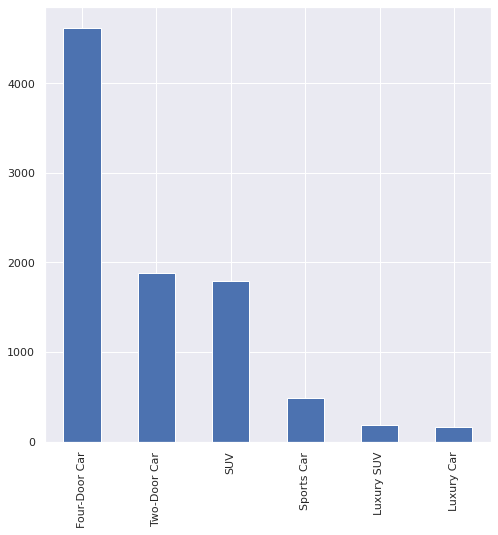

In [59]:
ax = Vehicle_Class.plot(kind="bar",grid=True,figsize=(8,8))
plt.show()

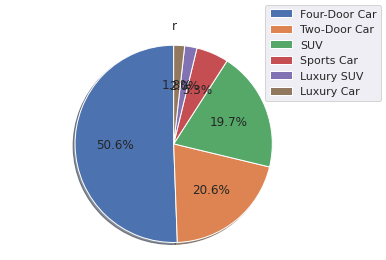

In [60]:
fig, ax = plt.subplots()
ax.pie(Vehicle_Class, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
fig.legend(Vehicle_Class.index)
plt.title('r')
plt.show()

In [0]:
by_offer_vh_class = df.loc[df.Response == 1].groupby(["Renew_Offer_Type","Vehicle_Class"])["Customer"].count()

In [62]:
by_offer_vh_class

Renew_Offer_Type  Vehicle_Class
Offer1            Four-Door Car    264
                  Luxury Car         6
                  Luxury SUV        18
                  SUV              168
                  Sports Car        42
                  Two-Door Car      96
Offer2            Four-Door Car    336
                  Luxury Car         6
                  Luxury SUV        12
                  SUV              120
                  Sports Car        48
                  Two-Door Car     162
Offer3            Four-Door Car     24
                  Two-Door Car       6
Name: Customer, dtype: int64

In [0]:
by_of_vh_plot = (by_offer_vh_class/df.groupby("Renew_Offer_Type")["Customer"].count()).unstack().fillna(0)

In [64]:
by_of_vh_plot

Vehicle_Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew_Offer_Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


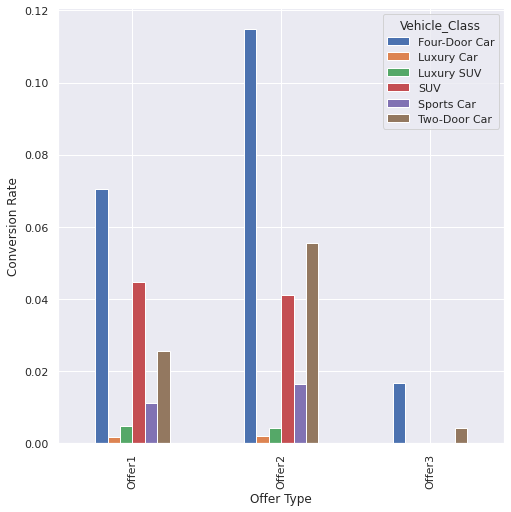

In [65]:
ax = by_of_vh_plot.plot(kind="bar",grid=True,figsize=(8,8))
ax.set_xlabel("Offer Type")
ax.set_ylabel("Conversion Rate")
plt.show()

## Suspicious values

There is some suspisious values
*   Income = 0
*   maybe some outliers to avoid in 'Total Claim Amount'


In [66]:
df.describe()


,Customer_Lifetime_Value,Response,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,0.143201,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,0.350297,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,0.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,0.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,1.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### 'Total Claim Amount' variable

On this boxplot of 'Total Claim Amount' variable, dots above the upper boundary could be suspected as Outliers. They represent values above 1.5 Interquartile range (IQR). However i choose to keep them as it is, cause these values are certainly no mistake.

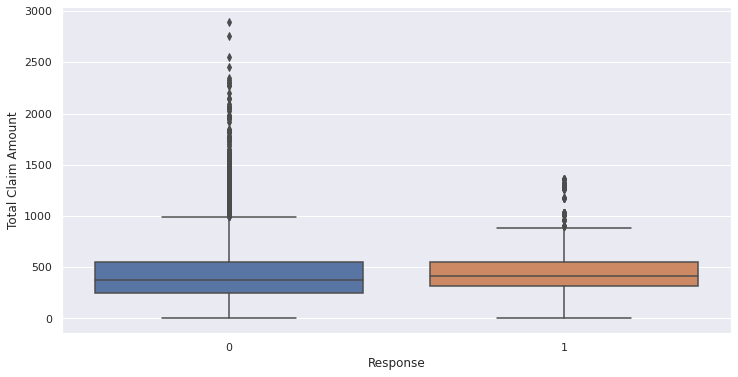

In [67]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Total_Claim_Amount' , x = 'Response', data = df)
plt.ylabel('Total Claim Amount')
plt.show()

Let's check that with a distplot for 'Total Claim Amount' distribution

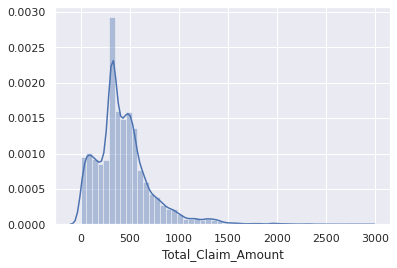

In [68]:
sns.distplot(df['Total_Claim_Amount'])

In [0]:
#Replace 'Total Claim Amount' outliers by mean
#df['Total Claim Amount']=df['Total Claim Amount'].apply(lambda x:df['Total Claim Amount'].median() if x>1500 else x)

### 'Income' variable

Box plot shows no outliers for 'Income', However the zero values are very suspiscious and represent for sure Nan rather than a accurate values

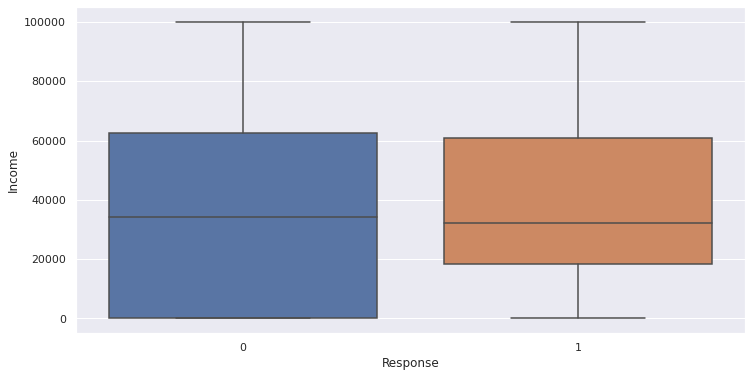

In [70]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Income' , x = 'Response', data = df)
plt.ylabel('Income')
plt.show()

These Zero values represent a significant proprotion in this dataset. we'll try to figure out how many.

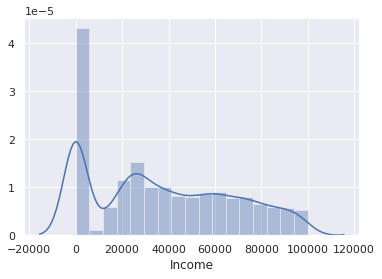

In [71]:
sns.distplot(df['Income'])

In [0]:
mask = df[df['Income'] == 0]

In [73]:
mask.shape

(2317, 24)

In [74]:
len(mask)/len(df)

0.25366761550251804

25% of the dataset contains Income = 0. We need to replace this missing values by more accurate values.


## Correlation

In [0]:
# drop unrelevant variables
df = df.drop(columns={"Customer","Policy", "Effective_To_Date"})

In [0]:
# Define a list with all features which are categorial

df_categ = df.select_dtypes(include=["object"])
categ = list(df_categ.columns)

In [0]:
# Define a list with all features which are numerical
df_num = df.select_dtypes(exclude=["object"])

In [0]:
# Encode the categorial Data to numerical

lb = LabelEncoder()

for i in categ:
    df[i] = lb.fit_transform(df[i])

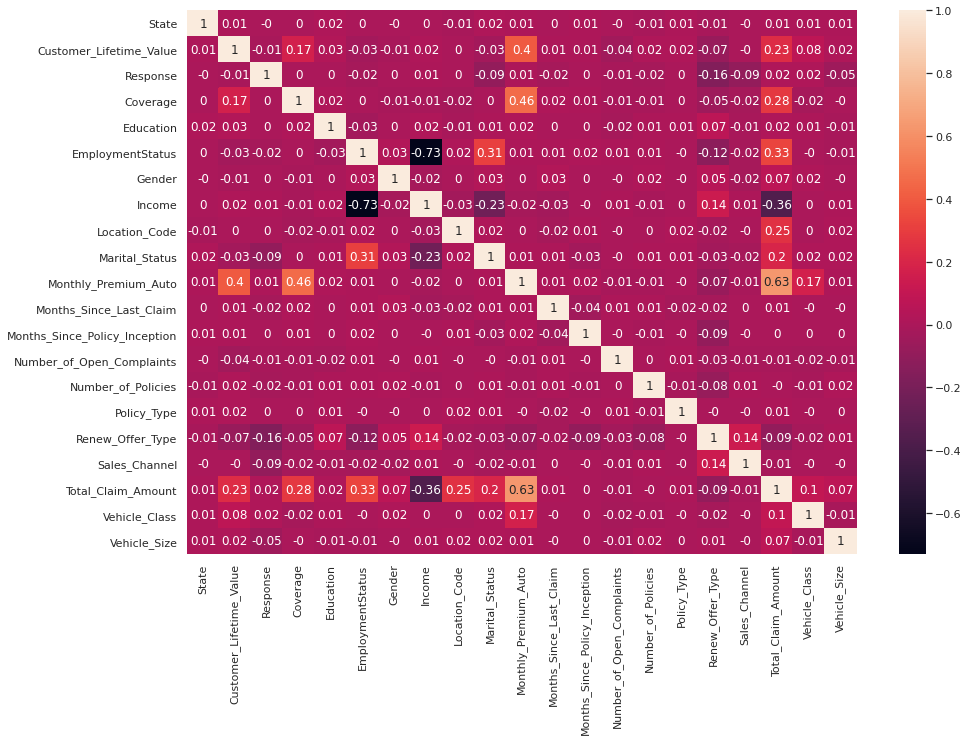

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.corr(),2), annot=True)

3 highest correlations :

* -0,73 between EmploymentStatus & Income

* 0,63 between TotalClaimAmount & Monthly_Premium_Auto

* 0,46 between Coverage & Monthly_Premium_Auto

the first one is easily understandable since the income depend on the EmploymentStatus. We'll try to drop one of them

# Features cleaning ('Income' Variable)

## Drop missing values

In [80]:
df2 = df.copy() 
# creating independent copy of data frame 
  
Income_clean = df['Income'].replace(0, np.nan)
# storing data in new var 
  
df2["Income_clean"]= Income_clean
# creating new col and passing var 
  
df2.head() 

,State,Customer_Lifetime_Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Income_clean
0,4,2763.519279,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,0,0,384.811147,5,1,56274.0
1,0,6979.535903,0,1,0,4,0,0,1,2,94,13,42,0,8,1,2,0,1131.464935,0,1,NaN
2,2,12887.431650,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,0,0,566.472247,5,1,48767.0
3,1,7645.861827,0,0,0,4,1,0,1,1,106,18,65,0,7,0,0,2,529.881344,3,1,NaN
4,4,2813.692575,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,0,0,138.130879,0,1,43836.0


In [81]:
df2 = df2.dropna()
df2.shape

(6817, 22)

In [82]:
df.shape

(9134, 21)

## Replace missing values with interpolation (test)

In [0]:
#df2 = df.to_numpy()

In [0]:
#from fancyimpute import KNN
#df['Income'] = pd.DataFrame(KNN(k=3).fit_transform(df['Income']))

In [0]:
#df['Income'].head()

## Distribution checking

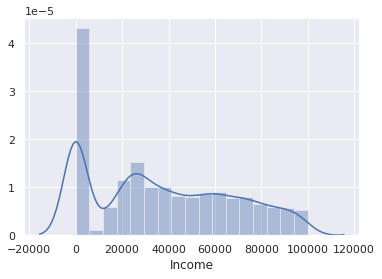

In [86]:
sns.distplot(df['Income'])

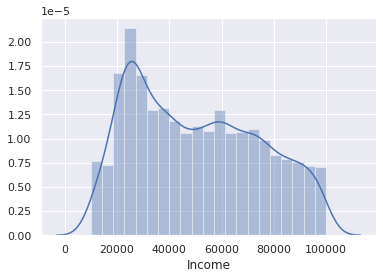

In [87]:
sns.distplot(df2['Income'])

#Metrics

**Accuracy**

correctly predicted  / total predicted

TP+TN/TP+FP+FN+TN

This Metrics show us how the model is able to predict well if a customer will convert or not

**Precision**

true positive / total positive

TP/TP+FP

Ability of the model not to label as converted a customer that will not be converted

**Recall**

true positive / observation that should be predicted positive

TP/TP+FN

Ability of the model to find all the customers that have the best chance to be converted


**F1 Score**

Takes both false positives and false negatives into account

`2*(Recall * Precision) / (Recall + Precision)`

F1 is usually more useful than accuracy, especially for an uneven class distribution.

# Preprocessing

In [88]:
# Dummyfication 
df_dummified = pd.get_dummies(df, drop_first=True)
df_dummified.head(10)

,State,Customer_Lifetime_Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,94,13,42,0,8,1,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,106,18,65,0,7,0,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,0,0,138.130879,0,1
5,3,8256.297800,1,0,0,1,0,62902,0,1,69,14,94,0,2,1,1,3,159.383042,5,1
6,3,5380.898636,1,0,1,1,0,55350,1,1,67,0,13,0,9,0,0,0,321.600000,0,1
7,0,7216.100311,0,2,4,4,1,0,2,2,101,0,68,0,4,0,0,0,363.029680,0,1
8,3,24127.504020,1,0,0,2,1,14072,1,0,71,13,3,0,2,0,0,0,511.200000,0,1
9,3,7388.178085,0,1,1,1,0,28812,2,1,93,17,7,0,8,2,1,1,425.527834,0,1


In [89]:
# Dummyfication df2
df2_dummified = pd.get_dummies(df2, drop_first=True)
df2_dummified.head(10)

,State,Customer_Lifetime_Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Income_clean
0,4,2763.519279,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,0,0,384.811147,5,1,56274.0
2,2,12887.431650,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,0,0,566.472247,5,1,48767.0
4,4,2813.692575,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,0,0,138.130879,0,1,43836.0
5,3,8256.297800,1,0,0,1,0,62902,0,1,69,14,94,0,2,1,1,3,159.383042,5,1,62902.0
6,3,5380.898636,1,0,1,1,0,55350,1,1,67,0,13,0,9,0,0,0,321.600000,0,1,55350.0
8,3,24127.504020,1,0,0,2,1,14072,1,0,71,13,3,0,2,0,0,0,511.200000,0,1,14072.0
9,3,7388.178085,0,1,1,1,0,28812,2,1,93,17,7,0,8,2,1,1,425.527834,0,1,28812.0
12,1,8798.797003,0,2,4,1,1,77026,2,1,110,9,82,2,3,0,1,0,472.029737,0,1,77026.0
13,0,8819.018934,1,0,3,1,1,99845,1,1,110,23,25,1,8,0,1,1,528.000000,3,1,99845.0
14,1,5384.431665,0,0,1,1,1,83689,2,2,70,21,10,2,8,0,3,2,307.139132,0,1,83689.0


# Machine Learning (Income = 0 included)

## Logistic regression (Income = 0 included)

In [0]:
y = df_dummified["Response"]

In [0]:
X = df_dummified.drop(["Response"], axis=1)

In [0]:
# Feature scaling 
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [94]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# initialize the model (=lr)
lr.fit(X_train,y_train)
#fit the model to the train set
lr_acc_test = lr.score(X_test,y_test)*100
lr_acc_train = lr.score(X_train,y_train)*100

# comparing the test with the data
print("Logistic Regression Test Accuracy", round(lr_acc_test, 2),"%")
print("Logistic Regression Train Accuracy", round(lr_acc_train, 2),"%")

Logistic Regression Test Accuracy 85.44 %
Logistic Regression Train Accuracy 85.73 %


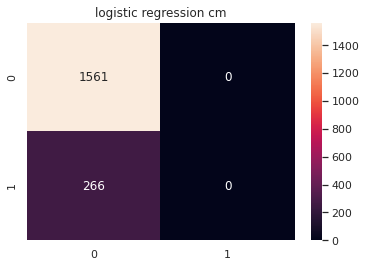

In [95]:
y_pred = lr.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d").set_title("logistic regression cm")
plt.show()

* TP = 0
* FN = 266
* TN = 1561
* FP = 0

In [124]:
y_pred.shape

(1827,)

In [96]:
lr_recall = recall_score(y_test, y_pred)
lr_precision = precision_score(y_test,y_pred)
lr_f1 = f1_score(y_test,y_pred)

print("lr_recall is",(lr_recall))
print("lr_precision is",(lr_precision))
print("lr_f1_score is",(lr_precision))

lr_recall is 0.0
lr_precision is 0.0
lr_f1_score is 0.0


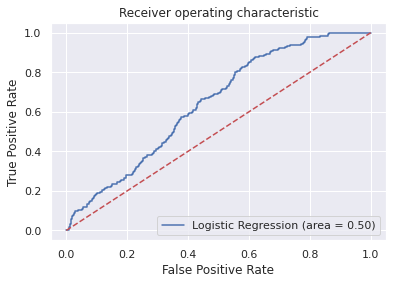

In [97]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Decision tree (Income = 0 included)

In [98]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_train = dtc.score(X_train, y_train)*100
acc_test = dtc.score(X_test,y_test)*100

print("The accuracy score for the training data is: ",round(acc_train,2),"%")
print("The accuracy score for the test data is: ",round(acc_test,2),"%")


The accuracy score for the training data is:  100.0 %
The accuracy score for the test data is:  97.26 %


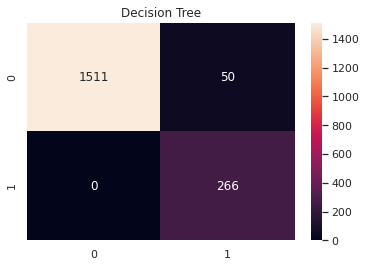

In [99]:
cm = metrics.confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm, annot=True, fmt="d").set_title("Decision Tree")
plt.show()

* TP = 266
* FN = 0
* TN = 1509
* FP = 53

In [100]:
dtc_recall = recall_score(y_test, y_pred_dtc)
dtc_precision = precision_score(y_test,y_pred_dtc)
dtc_f1 = f1_score(y_test,y_pred_dtc)

print("dtc_recall is",(dtc_recall))
print("dtc_precision is",(dtc_precision))
print("dtc_f1_score is",(dtc_precision))

dtc_recall is 1.0
dtc_precision is 0.8417721518987342
dtc_f1_score is 0.8417721518987342


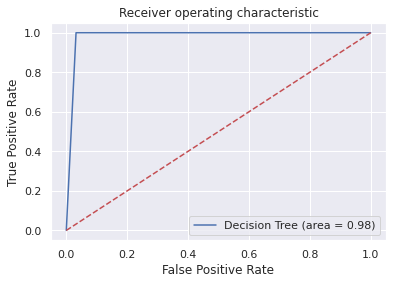

In [101]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dec_roc_auc = roc_auc_score(y_test, dtc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dec_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Dec_ROC')
plt.show()

## Random Forest (Income = 0 Included)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [103]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

acc_train = rfc.score(X_train, y_train)*100
acc_test = rfc.score(X_test,y_test)*100

print("The accuracy score for the training data is: ",round(acc_train,2),"%")
print("The accuracy score for the test data is: ",round(acc_test,2),"%")

The accuracy score for the training data is:  100.0 %
The accuracy score for the test data is:  99.67 %


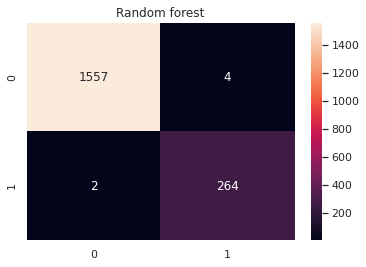

In [104]:
cm = metrics.confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, annot=True, fmt="d").set_title("Random forest")
plt.show()

* TP = 264
* FN = 3
* TN = 1558
* FP = 2

In [105]:
rfc_recall = recall_score(y_test, y_pred_rfc)
rfc_precision = precision_score(y_test,y_pred_rfc)
rfc_f1 = f1_score(y_test,y_pred_rfc)

print("rfc_recall is",(rfc_recall))
print("rfc_precision is",(rfc_precision))
print("rfc_f1_score is",(rfc_precision))

rfc_recall is 0.9924812030075187
rfc_precision is 0.9850746268656716
rfc_f1_score is 0.9850746268656716


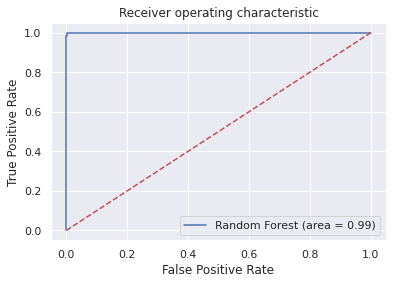

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('rfc_ROC')
plt.show()

# Machine Learning (Income=0 excluded)

## Logistic regression (Income = 0 excluded)

In [0]:
y = df2_dummified["Response"]

In [0]:
X = df2_dummified.drop(["Response"], axis=1)

In [0]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

In [0]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [111]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# initialize the model (=lr)

lr.fit(X_train,y_train)
#fit the model to the train set

y_pred_lr = lr.predict(X_test)

lr_acc_test = lr.score(X_test,y_test)*100
lr_acc_train = lr.score(X_train,y_train)*100
# comparing the test with the data

print("Logistic Regression Test Accuracy", round(lr_acc_test, 2),"%")
print("Logistic Regression Train Accuracy", round(lr_acc_train, 2),"%")

Logistic Regression Test Accuracy 85.19 %
Logistic Regression Train Accuracy 85.15 %


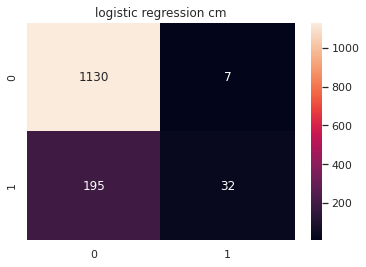

In [112]:
cm = metrics.confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d").set_title("logistic regression cm")
plt.show()

* TP = 32
* FN = 195
* TN = 1130
* FP = 7

In [113]:
lr_recall = recall_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test,y_pred_lr)
lr_f1 = f1_score(y_test,y_pred_lr)

print("lr_recall is",(lr_recall))
print("lr_precision is",(lr_precision))
print("lr_f1 score is",(lr_f1))

lr_recall is 0.14096916299559473
lr_precision is 0.8205128205128205
lr_f1 score is 0.2406015037593985


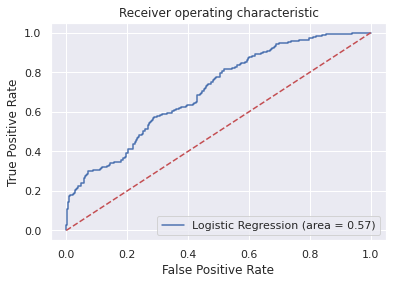

In [114]:
# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Decision tree (Income = 0 excluded)

In [115]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_train = dtc.score(X_train, y_train)*100
acc_test = dtc.score(X_test,y_test)*100

print("The accuracy score for the training data is: ",round(acc_train,2),"%")
print("The accuracy score for the test data is: ",round(acc_test,2),"%")


The accuracy score for the training data is:  100.0 %
The accuracy score for the test data is:  96.55 %


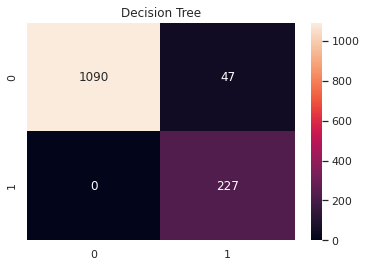

In [116]:
cm = metrics.confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm, annot=True, fmt="d").set_title("Decision Tree")
plt.show()

* TP = 227
* FN = 2
* TN = 1086
* FP = 51

In [117]:
dtc_recall = recall_score(y_test, y_pred_dtc)
dtc_precision = precision_score(y_test,y_pred_dtc)
dtc_f1 = f1_score(y_test,y_pred_dtc)

print("dtc_recall is",(dtc_recall))
print("dtc_precision is",(dtc_precision))
print("dtc_f1 score is",(dtc_f1))

dtc_recall is 1.0
dtc_precision is 0.8284671532846716
dtc_f1 score is 0.9061876247504991


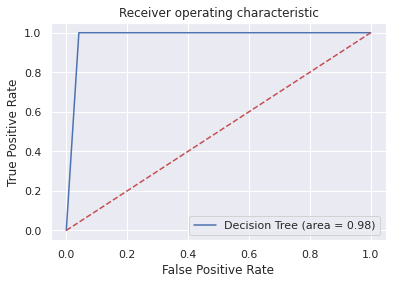

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dec_roc_auc = roc_auc_score(y_test, dtc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dec_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Dec_ROC')
plt.show()

## Random Forest (Income = 0 Included)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [120]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

acc_train = rfc.score(X_train, y_train)*100
acc_test = rfc.score(X_test,y_test)*100

print("The accuracy score for the training data is: ",round(acc_train,2),"%")
print("The accuracy score for the test data is: ",round(acc_test,2),"%")

The accuracy score for the training data is:  100.0 %
The accuracy score for the test data is:  99.71 %


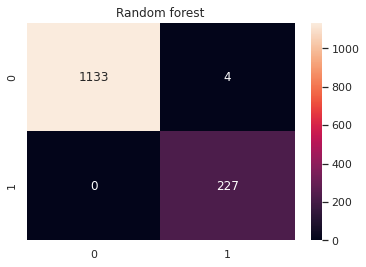

In [121]:
cm = metrics.confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, annot=True, fmt="d").set_title("Random forest")
plt.show()

* TP = 264
* FN = 3
* TN = 1558
* FP = 2

In [122]:
rfc_recall = recall_score(y_test, y_pred_rfc)
rfc_precision = precision_score(y_test,y_pred_rfc)
rfc_f1 = f1_score(y_test,y_pred_rfc)

print("rfc_recall is",round(rfc_recall,2))
print("rfc_precision is",round(rfc_precision,2))
print("rfc_f1 score is",round(rfc_f1,2))

rfc_recall is 1.0
rfc_precision is 0.98
rfc_f1 score is 0.99


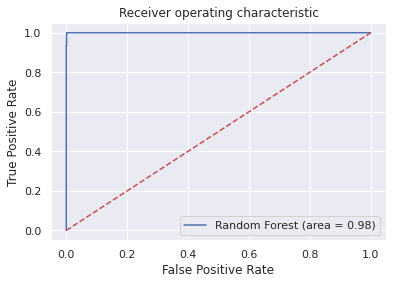

In [123]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % dec_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Dec_ROC')
plt.show()